# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Boston Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()
boston_features = pd.DataFrame(boston.data, columns=boston.feature_names)

In [1]:
# __SOLUTION__ 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()
boston_features = pd.DataFrame(boston.data, columns=boston.feature_names)

Run the cell below to split the data into predictor and target variables. 

In [ ]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns=['target'])

In [2]:
# __SOLUTION__ 
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns=['target'])

### Perform a train-test split 

- Split the data into training and test sets 
- Use the default split size 
- Set the seed to 42 

In [ ]:
# Import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = None

# Print the dimensions of training and test split


In [3]:
# __SOLUTION__ 
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Print the dimensions of training and test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

379 127 379 127


We created a function that preprocesses the data for you. It takes the input training and test sets as the inputs and returns the preprocessed input training and test sets. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OneHotEncoder

# Preprocess input data
def preprocess_data(input_train, input_test): 
    
    # Instantiate a StandardScaler 
    standard_scaler = StandardScaler() 
    
    # Instantiate a MinMaxScaler 
    min_max_scaler = MinMaxScaler() 
    
    # Instantiate a custom transformer for log transformation  
    log_transformer = FunctionTransformer(np.log, validate=True)
    
    # Columns to be log transformed  
    log_columns = ['DIS', 'LSTAT']  
    
    # Log transform the training columns and convert them into a DataFrame  
    log_train = pd.DataFrame(log_transformer.fit_transform(input_train[log_columns]), 
                             columns=['log_DIS', 'log_LSTAT']) 
    
    # Log transform the test columns and convert them into a DataFrame  
    log_test = pd.DataFrame(log_transformer.transform(input_test[log_columns]), 
                            columns=['log_DIS', 'log_LSTAT'])
    
    # Concatenate the log transform columns - training set 
    input_train_combined = pd.concat([input_train.reset_index(drop=True), log_train], axis=1) 
    
    # Concatenate the log transform columns - test set  
    input_test_combined = pd.concat([input_test.reset_index(drop=True), log_test], axis=1) 
    
    # Apply MinMaxScaler to training columns 
    scaled_train_1 = pd.DataFrame(min_max_scaler.fit_transform(input_train_combined[['B', 'log_DIS']]), 
                                  columns=['scaled_B', 'scaled_DIS']) 
    
    # Apply MinMaxScaler to test columns  
    scaled_test_1 = pd.DataFrame(min_max_scaler.transform(input_test_combined[['B', 'log_DIS']]), 
                                 columns=['scaled_B', 'scaled_DIS']) 
    
    # Apply StandardScaler to training columns 
    scaled_train_2 = pd.DataFrame(standard_scaler.fit_transform(input_train_combined[['log_LSTAT']]), 
                                  columns=['scaled_LSTAT']) 
    
    # Apply StandardScaler to test columns 
    scaled_test_2 = pd.DataFrame(standard_scaler.transform(input_test_combined[['log_LSTAT']]), 
                                 columns=['scaled_LSTAT'])
    
    # Combine continuous and categorical feature DataFrames 
    input_train_processed = pd.concat([input_train_combined[['CHAS', 'RM']], scaled_train_1, scaled_train_2], axis=1) 
    input_test_processed = pd.concat([input_test_combined[['CHAS', 'RM']], scaled_test_1, scaled_test_2], axis=1)
    
    return input_train_processed, input_test_processed

In [4]:
# __SOLUTION__ 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OneHotEncoder

# Preprocess input data
def preprocess_data(input_train, input_test): 
    
    # Instantiate a StandardScaler 
    standard_scaler = StandardScaler() 
    
    # Instantiate a MinMaxScaler 
    min_max_scaler = MinMaxScaler() 
    
    # Instantiate a custom transformer for log transformation  
    log_transformer = FunctionTransformer(np.log, validate=True)
    
    # Columns to be log transformed  
    log_columns = ['DIS', 'LSTAT']  
    
    # Log transform the training columns and convert them into a DataFrame  
    log_train = pd.DataFrame(log_transformer.fit_transform(input_train[log_columns]), 
                             columns=['log_DIS', 'log_LSTAT']) 
    
    # Log transform the test columns and convert them into a DataFrame  
    log_test = pd.DataFrame(log_transformer.transform(input_test[log_columns]), 
                            columns=['log_DIS', 'log_LSTAT'])
    
    # Concatenate the log transform columns - training set 
    input_train_combined = pd.concat([input_train.reset_index(drop=True), log_train], axis=1) 
    
    # Concatenate the log transform columns - test set  
    input_test_combined = pd.concat([input_test.reset_index(drop=True), log_test], axis=1) 
    
    # Apply MinMaxScaler to training columns 
    scaled_train_1 = pd.DataFrame(min_max_scaler.fit_transform(input_train_combined[['B', 'log_DIS']]), 
                                  columns=['scaled_B', 'scaled_DIS']) 
    
    # Apply MinMaxScaler to test columns  
    scaled_test_1 = pd.DataFrame(min_max_scaler.transform(input_test_combined[['B', 'log_DIS']]), 
                                 columns=['scaled_B', 'scaled_DIS']) 
    
    # Apply StandardScaler to training columns 
    scaled_train_2 = pd.DataFrame(standard_scaler.fit_transform(input_train_combined[['log_LSTAT']]), 
                                  columns=['scaled_LSTAT']) 
    
    # Apply StandardScaler to test columns 
    scaled_test_2 = pd.DataFrame(standard_scaler.transform(input_test_combined[['log_LSTAT']]), 
                                 columns=['scaled_LSTAT'])
    
    # Combine continuous and categorical feature DataFrames 
    input_train_processed = pd.concat([input_train_combined[['CHAS', 'RM']], scaled_train_1, scaled_train_2], axis=1) 
    input_test_processed = pd.concat([input_test_combined[['CHAS', 'RM']], scaled_test_1, scaled_test_2], axis=1)
    
    return input_train_processed, input_test_processed

Use this function to proprocess your `X_train` and `X_test`. 

In [ ]:
X_train_processed, X_test_processed = None

In [5]:
# __SOLUTION__ 
X_train_processed, X_test_processed = preprocess_data(X_train, X_test)

### Apply your model to the train set

In [ ]:
# Importing and initialize the linear regression model class


In [6]:
# __SOLUTION__ 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [ ]:
# Fit the model to train data


In [7]:
# __SOLUTION__ 
linreg.fit(X_train_processed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate predictions on training and test sets

In [ ]:
# Calculate predictions on training and test sets


In [8]:
# __SOLUTION__ 
y_hat_train = linreg.predict(X_train_processed)
y_hat_test = linreg.predict(X_test_processed)

### Calculate training and test residuals

In [ ]:
# Calculate residuals


In [9]:
# __SOLUTION__ 
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [ ]:
# Import mean_squared_error from sklearn.metrics


# Calculate training and test MSE


In [10]:
# __SOLUTION__ 
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 21.53681560755561
Test Mean Squarred Error: 22.4720352789069


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases. 

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph. 

> NOTE: Make sure you preprocess the input data after splitting it into training and test sets. 

In [ ]:
import random
random.seed(11)


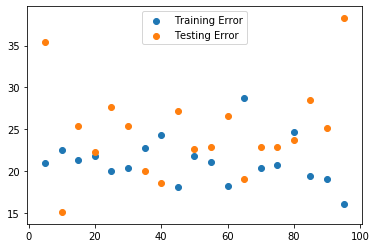

In [11]:
# __SOLUTION__ 
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    X_train_processed, X_test_processed = preprocess_data(X_train, X_test)
    linreg.fit(X_train_processed, y_train)
    y_hat_train = linreg.predict(X_train_processed)
    y_hat_test = linreg.predict(X_test_processed)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend();

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [ ]:
# ⏰ This cell may take several mintes to run
random.seed(8)


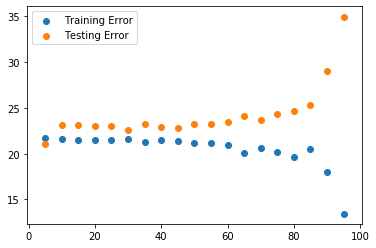

In [12]:
# __SOLUTION__ 
# ⏰ This cell may take several mintes to run
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        X_train_processed, X_test_processed = preprocess_data(X_train, X_test)
        linreg.fit(X_train_processed, y_train)
        y_hat_train = linreg.predict(X_train_processed)
        y_hat_test = linreg.predict(X_test_processed)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend();

What's happening here? Evaluate your result! 

##  Summary  

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.